#ALGORITMO
Autor: Ronaldo David Cornejo Valencia - u201816502

Técnica Principal: Fuerza Bruta

## Conceptos Básicos para entendimiento del algoritmo

El grafo para este algoritmo es un grafo completo no dirigido, pues puedes ir de un punto a cualquier otro punto como si fuera un camino. Para formular el algoritmo, se utilizó una matriz adyacente, con peso, que represente el grafo.

Las aritas del grafo representan la distancia de un punto a otro punto. El objetivo es encontrar los caminos que puede seguir los autos, partiendo desde el almacen, para cumplir con el tiempo máximo que se le puede entregar un producto al cliente (punto de entrega). Esto se da sin descuidar la distancia del recorrido, pues también buscamos disminuir el recorrido de los autos.

A continuación, se mostrará un ejemplo de un recorrido donde muestra la distancia total recorrida y el tiempo máximo de entrega en 1 ruta de un auto.
Donde el punto 0 es el almacén y recorre por el 1,3 y regresa al 0. Para mayor comprensión (Cada unidad es 1 kilometro, por cada kilometro es 1 hora, esto significa que será proporcional -> 1 km = 1 hora)


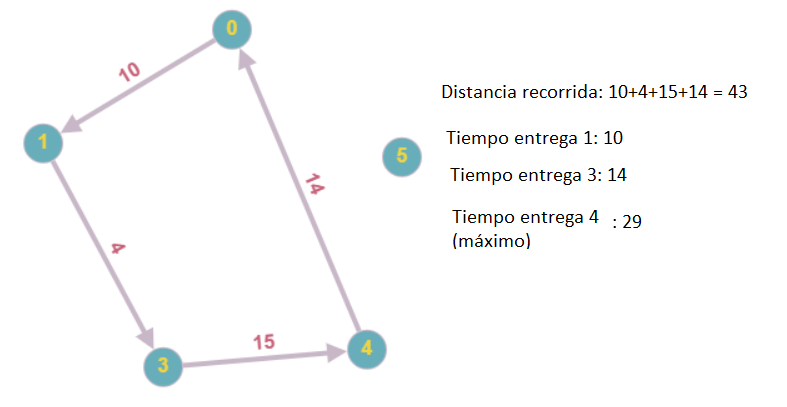

## Inicio del Algoritmo

Primero, necesitamos desarrollar una función que retorne el camino más corto de un origen y de los puntos de entrega que dispongas. De parámetros tenemos el almacen, los puntos de entrega y la matriz de adyacencia (el grafo).

Utilizamos Fuerza bruta para verificar todos los posibles caminos que puede tener para que recorra todos los nodos. De esta manera, podemos compararlos y obtener el recorrido más corto. Además, se puede obtener el tiempo máximo de entrega y el orden que tienen que seguir los puntos de entrega para obtener el camino más corto.

In [11]:
import itertools as ite
import numpy as np
import pandas as pd
import math

In [12]:
def recorridoMinimo_Distancia_Tiempo(almacen,entregas,G):
  def distancia(u,entrega, G): #Función que solo suma el recorrido
    ini = u
    cont = 0
    distancia = 0
    tiempo = 0
    for i in entrega:
      cont += G[u,i]
      u = i
    tiempo = cont #Hasta aquí obtenemos el tiempo máximo de entrega de 1 ruta
    #Como es un ciclo, tiene que regresar
    cont += G[u,ini]
    distancia = cont #Aquí se obtiene el 
    return distancia,tiempo

  o = almacen
  combinaciones = list(ite.permutations(entregas)) #Aquí generamos todos los posibles caminos
  minLD = ()
  minD = 100000 #Se colocan números altos para obtener el mínimo posible
  minT = 100000
  for c in combinaciones:
    valorD,valorT = distancia(o,c,G)
    if minD > valorD: #Aquí comparamos para poder tener el camino mínimo
      minLD = c
      minD = valorD
      minT = valorT
    
  return minLD,minD,minT #Returna el orden que debe tener la ruta, 
                         #la distancia total del camino más corto, y el tiempo máximo de entrega de 1 ruta

Luego, para obtener las rutas que cumplan con el tiempo máximo de entrega y, además, sea el camino más corto posible. Utilizamos fuerza bruta para generar todas las combinaciones e ir probando cuáles cumplen con el tiempo máximo de entrega y que la ruta de 1 vehículo recorra todos los puntos de entrega posible.

En otras palabras, como esto es una planificación para enviar los productos a los clientes. Un carro tratará de hacer la mayor entrega posible a los clientes. En caso, de que para entregar a otro cliente, supere el tiempo máximo de entrega, no lo hará y regresará al almacen. Simplemente, se planifica que otro vehículo entregue ese envío. Esto se hace para respetar el tiempo máximo de entrega que exigen los clientes.

In [28]:
def VRP(G,almacen,tiempoMaximoEntrega):
  time = tiempoMaximoEntrega
  puntos = list(range(len(G))) #Obtenemos todos los puntos del grafo para ordenarlos en rutas
  puntos.remove(almacen) #Eliminamos el almacen, pues siempre comenzará de ahí
  n = len(puntos)
  maze = []
  mazeD = []
  mazeT = []
  while puntos: #Mientras que algún punto de entre aún no ha sido entregado
    if n >= 1:                 #Aquí generamos todas las combinaciones de mayor a menor
      entregas = list(ite.combinations(puntos,n)) #... O((n-1)!)
      for entrega in entregas:
        minLD,minD,minT = recorridoMinimo_Distancia_Tiempo(almacen,entrega,G)
        if minT <= time: #Si un recorrido cumple con el tiempo máximo de entrega, entonces es una ruta aprobada
          maze.append(minLD) #Agregamos la ruta encontrada
          mazeD.append(minD) #Agreamos la distancia de ruta
          mazeT.append(minT)
          for i in minLD:
            puntos.remove(i) #Eliminamos todos los puntos que ya estén en una ruta
          break
      n -= 1
    else:
      break
  print("Rutas aprobadas: ", maze)
  print("Distancia de rutas: ",mazeD)
  print("Tiempo maximo de rutas: ",mazeT)

## Ejemplo de aplicación del Algoritmo

In [14]:
%%file grafis.in
x 5 11 9 18 12 14 7
5 x 4 6 9 10 14 12
11 4 x 3 6 10 14 16
9 6 3 x 6 8 17 13
18 9 6 6 x 4 7 9
12 10 10 8 4 x 5 6
14 14 14 17 7 5 x 4
7 12 16 13 9 6 4 x

Overwriting grafis.in


In [15]:
df = pd.read_csv("grafis.in", sep=" ", header=None).replace("x", np.nan)
G = df.to_numpy().astype(np.float)
print(G)

[[nan  5. 11.  9. 18. 12. 14.  7.]
 [ 5. nan  4.  6.  9. 10. 14. 12.]
 [11.  4. nan  3.  6. 10. 14. 16.]
 [ 9.  6.  3. nan  6.  8. 17. 13.]
 [18.  9.  6.  6. nan  4.  7.  9.]
 [12. 10. 10.  8.  4. nan  5.  6.]
 [14. 14. 14. 17.  7.  5. nan  4.]
 [ 7. 12. 16. 13.  9.  6.  4. nan]]


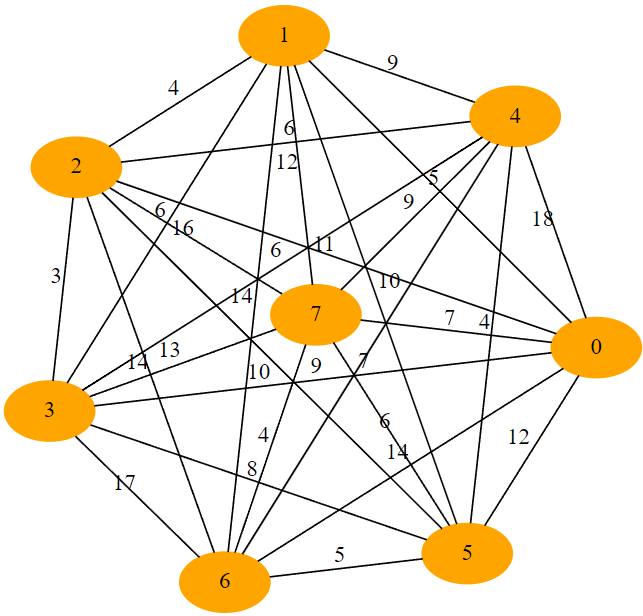

Suponiendo que 25 es el tiempo máximo de espera de 1 cliente y el almacen es el punto 4

In [29]:
VRP(G,4,25)

Rutas aprobadas:  [(3, 2, 1, 0, 7), (5, 6)]
Distancia de rutas:  [34.0, 16.0]
Tiempo maximo de rutas:  [25.0, 9.0]


Rutas 1: (3,2,1,0,7) -> Inicia del almacen y termina en el almacen: 4->3->2->1->0->7->4 El recorrido total:34, tiempo de espera 25 (cumple <= 25)

Ruta 2: (5,6) -> Inicia del almacen y termina en el almacen: 4->5->6->4 El recorrido total: 25, tiempo de espera: 9 (cumple <= 25)

Muestra las rutas en orden que debe seguir, como se muestra acontinuación
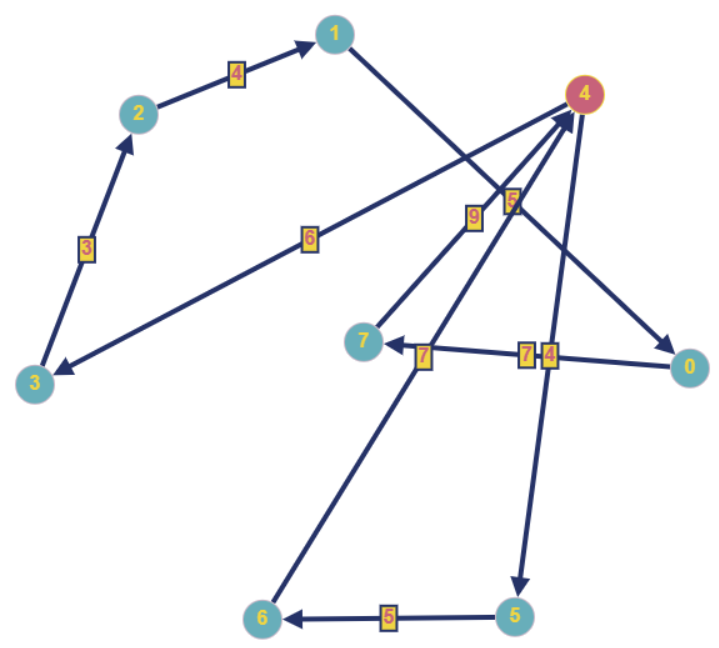

## Conclusión

En conclusión, el algoritmo es poco eficiente, pues tiene una alta complejidad. Esto se debe a que se utilizó fuerza bruta como táctica. Al utilizar combinaciones y permutaciones, este algoritmo tiene una complejidad igual o superior a O(n!). Personalmente, considero que este es un inicio. Se optimizará para los próximos hitos. Gracias :)